<a href="https://colab.research.google.com/github/obizoba/BIZI/blob/master/Final_Code_sentinment_analysis_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style,rcParams
style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
import re
%matplotlib inline

In [ ]:
df = pd.read_csv('Twitter-sentiment-self-drive-DFE.csv', encoding='latin')

Natural Language Processing
nltk - Natural Language Toolkit is a collection of libraries for natural language processing
stopwords - collection of words that don't provide any meaning to a sentence
WordNetLemmatizer - used to convert different forms of words into a single item but still keeping the context intact

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# for the machine learning model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier



## for evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#### working with the data

In [ ]:
data = df[['text', 'sentiment']]

In [ ]:
data.head()

,text,sentiment
0,Two places I'd invest all my money if I could:...,5
1,Awesome! Google driverless cars will help the ...,5
2,If Google maps can't keep up with road constru...,2
3,Autonomous cars seem way overhyped given the t...,2
4,Just saw Google self-driving car on I-34. It w...,3


In [ ]:
data['sentiment'].value_counts()

3               4245
4               1444
2                685
5                459
not_relevant     213
1                110
Name: sentiment, dtype: int64

In [ ]:
# remove the not_relevant data
data = data[data['sentiment'] != 'not_relevant'].reset_index(drop=True)

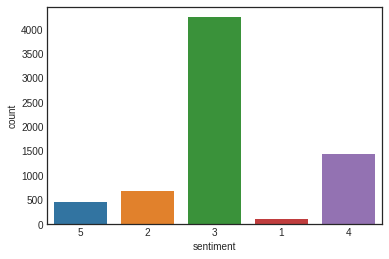

In [ ]:
sns.countplot(data['sentiment'])

In [ ]:
data.columns # columns of the data

Index(['text', 'sentiment'], dtype='object')

In [ ]:
print('length of data is', len(data))

length of data is 6943


In [ ]:
print('The shape of the data is', len(data.shape))

The shape of the data is 2


In [ ]:
# checking for missing value
np.sum(data.isnull().any(axis=1))

0

In [ ]:
print('Count of columns in the data is:  ', len(data.columns))
print('Count of rows in the data is:  ', len(data))

Count of columns in the data is:   2
Count of rows in the data is:   6943


In [ ]:
data['sentiment'].unique()

array(['5', '2', '3', '1', '4'], dtype=object)

In order to sample the data well, we are going to have a fuction that make 1-2 (Negative) == 1, 2 (Neutral) and 4-5 (Positive) == 3

In [ ]:
def sample(x):
  if x <= '2':
    return 1 # negative word
  elif x == '3':
    return 2 # neutral word
  else:
    return 3 # positive word

In [ ]:
data['sentiment'] = data['sentiment'].apply(sample)

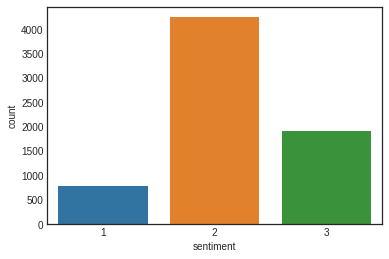

In [ ]:
sns.countplot(data['sentiment'])

In [ ]:
data['sentiment'].value_counts(normalize=True) *100

2    61.140717
3    27.408901
1    11.450382
Name: sentiment, dtype: float64

## data preprocessing
In the above-given problem statement before training the model, we have performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form known as lemma) for better results.

### Lower case the data

In [ ]:
data['text']=data['text'].str.lower()
data['text'].tail()

6938    florida is one of a few states that allows tes...
6939    many states still considering allowing self-dr...
6940    heading to a tech conference which will focus ...
6941    fully autonomous vehicles are one of many auto...
6942    a new study just commissioned to study the cos...
Name: text, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in','saw',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].tail()

6938    florida one states allows testing autonomous v...
6939    many states still considering allowing self-dr...
6940    heading tech conference focus transportation d...
6941    fully autonomous vehicles one many automation ...
6942    new study commissioned study costs self-drivin...
Name: text, dtype: object

The stop words as been removed

## Cleaning and removing punctuations

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

6938    florida one states allows testing autonomous v...
6939    many states still considering allowing selfdri...
6940    heading tech conference focus transportation d...
6941    fully autonomous vehicles one many automation ...
6942    new study commissioned study costs selfdriving...
Name: text, dtype: object

## removing repeating characters using regular expression 

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

6938    florida one states allows testing autonomous v...
6939    many states still considering allowing selfdri...
6940    heading tech conference focus transportation d...
6941    fully autonomous vehicles one many automation ...
6942    new study commissioned study costs selfdriving...
Name: text, dtype: object

## removing URL's since the data is collected from a search engine

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

6938    florida one states allows testing autonomous v...
6939    many states still considering allowing selfdri...
6940    heading tech conference focus transportation d...
6941    fully autonomous vehicles one many automation ...
6942    new study commissioned study costs selfdriving...
Name: text, dtype: object

## removing numbers

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

0    two places id invest money could d printing se...
1    awesome google driverless cars help blind trav...
2    google maps cant keep road construction suppos...
3    autonomous cars seem way overhyped given techn...
4          google selfdriving car i painted green blue
Name: text, dtype: object

## Tokenize the data

In [ ]:
tokenized_data = data['text'].apply(lambda x: x.split())
tokenized_data.head()

0    [two, places, id, invest, money, could, d, pri...
1    [awesome, google, driverless, cars, help, blin...
2    [google, maps, cant, keep, road, construction,...
3    [autonomous, cars, seem, way, overhyped, given...
4    [google, selfdriving, car, i, painted, green, ...
Name: text, dtype: object

Lemmatizer the data

In [ ]:
lm = nltk.WordNetLemmatizer()

tokenized_data = tokenized_data.apply(lambda x: [lm.lemmatize(i) for i in x]) # stemming
tokenized_data.head()

0    [two, place, id, invest, money, could, d, prin...
1    [awesome, google, driverless, car, help, blind...
2    [google, map, cant, keep, road, construction, ...
3    [autonomous, car, seem, way, overhyped, given,...
4    [google, selfdriving, car, i, painted, green, ...
Name: text, dtype: object

In [ ]:
for i in range(len(tokenized_data)):
    tokenized_data[i] = ' '.join(tokenized_data[i])

data['text'] = tokenized_data

In [ ]:
data.head()

,text,sentiment
0,two place id invest money could d printing sel...,3
1,awesome google driverless car help blind trave...,3
2,google map cant keep road construction suppose...,1
3,autonomous car seem way overhyped given techno...,1
4,google selfdriving car i painted green blue,2


### word cloud of the data

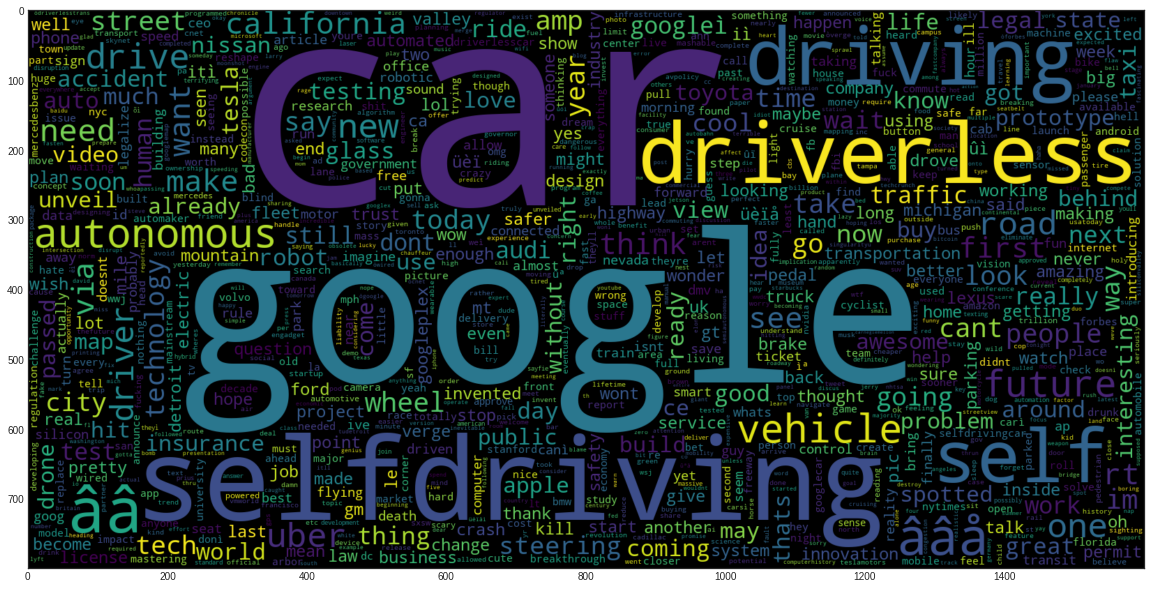

In [ ]:
data_word = data['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_word))
plt.imshow(wc,interpolation='bilinear')

## Word cloud on each class

In [ ]:
data_positive = data[data['sentiment'] == 3].reset_index(drop=True)

data_neutral = data[data['sentiment'] == 2].reset_index(drop=True)

data_negative = data[data['sentiment'] == 1].reset_index(drop=True)


### word cloud on positive word

In [ ]:
data_positive.shape

(1903, 2)

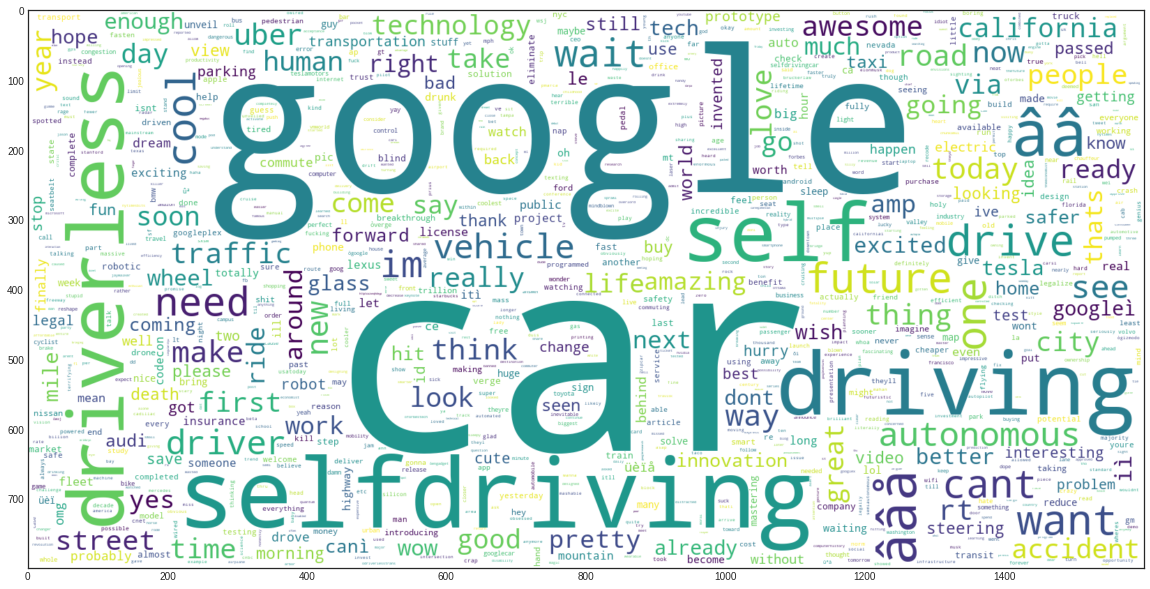

In [ ]:
data_word_positive = data_positive['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="white",
               collocations=False).generate(" ".join(data_word_positive))
plt.imshow(wc, interpolation='bilinear')

## word cloud on the neutral word

In [ ]:
data_neutral.shape

(4245, 2)

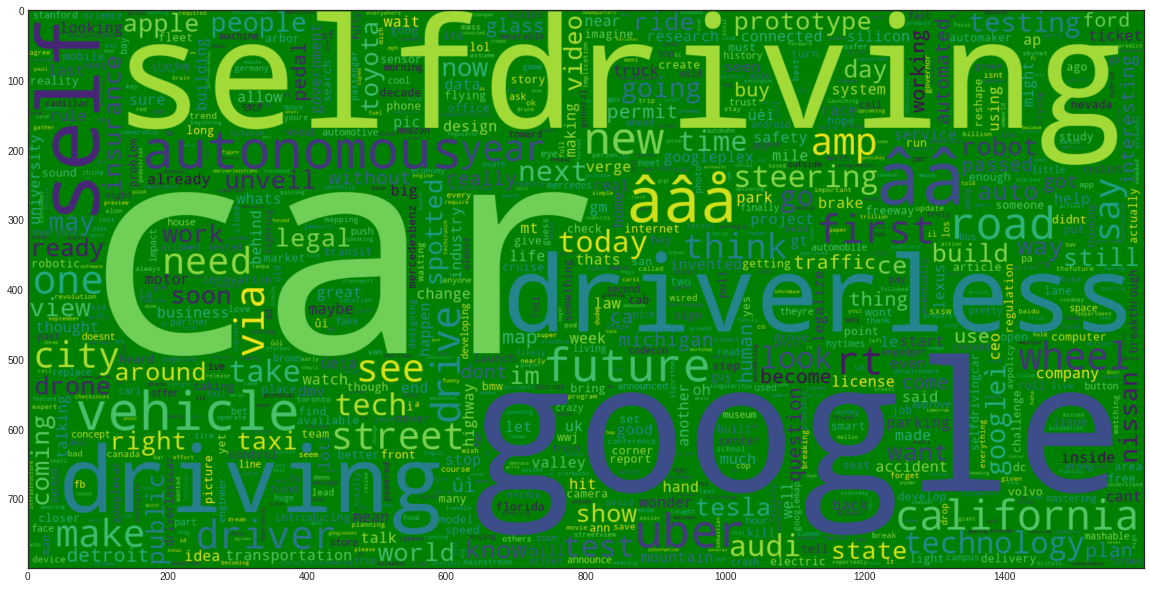

In [ ]:
data_word_neutral = data_neutral['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="green",
               collocations=False).generate(" ".join(data_word_neutral))
plt.imshow(wc,interpolation='bilinear')

### word cloud on the negative word

In [ ]:
data_negative.shape

(795, 2)

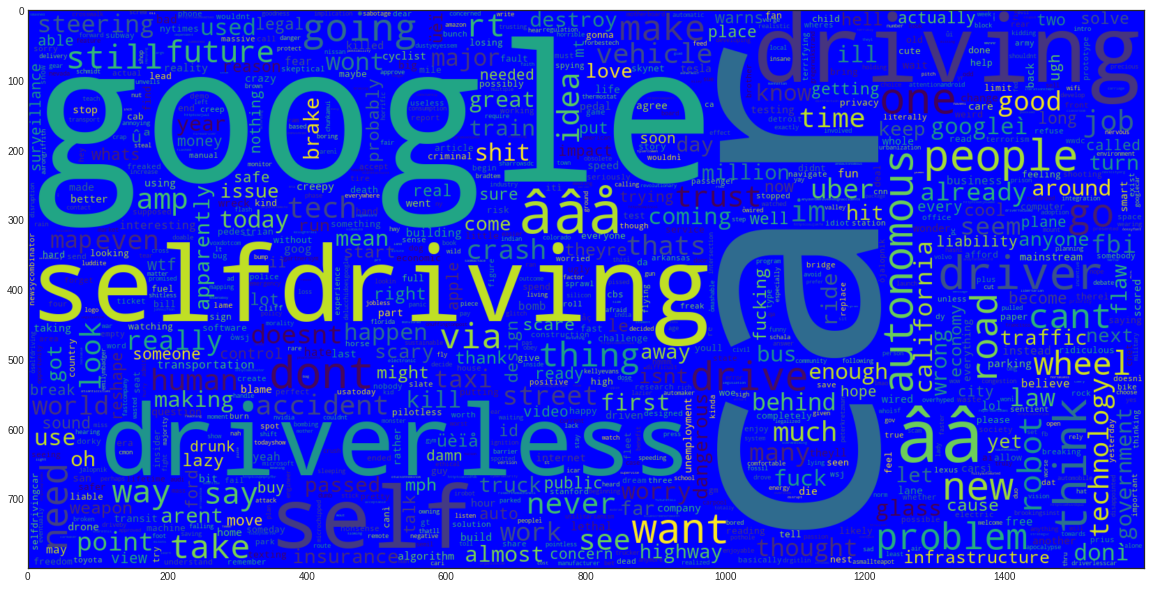

In [ ]:
data_word_negative = data_negative['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="blue",
               collocations=False).generate(" ".join(data_word_negative))
plt.imshow(wc,interpolation='bilinear')

## Transforming the data and machine learning

## Creating bag of word using python count vectorizer.

Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

In [ ]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

## seperating the data into train and test data

Here will be using train_split stratified with y to have teh same percentage of each class in train and test data

In [ ]:
X=data['text']
y=data['sentiment']

In [ ]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =2021, stratify=y)

In [ ]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (5554,)
Shape of the y_train (5554,)
Shape of the X_test (1389,)
Shape of the y_test (1389,)


In [ ]:


# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(list(X_train) + list(X_test))
X_train =  ctv.transform(X_train) 
X_test = ctv.transform(X_test)

## Comparing various machine learning model and check the accuracy

1. Support Vector Classifier

2. MLPClassifier (Neural Network)

3. RandomForest Classifier

4. Adaboost Classifier

5. Extra Tree Classifier

6. Xgboost Classifier

In [ ]:
#svc_model = SVC()
#?svc_model

#rf_model = RandomForestClassifier()
#?rf_model

xg_model = XGBClassifier()
?xg_model

In [ ]:
algos = [SVC(C=3.0, class_weight='balanced', random_state=0), 
         MLPClassifier(hidden_layer_sizes=10, activation='relu', solver='adam', alpha=0.01),
        RandomForestClassifier(max_depth=5,n_estimators=1000, max_features='auto', class_weight='balanced'),
         AdaBoostClassifier(n_estimators=500, learning_rate=0.1),
         ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=5, max_features='auto'),
         XGBClassifier(n_estimators=1000, learning_rate=0.1)]

names = ['Support_Vector_Machine', 'Multi-Layer-Perceptron', 'RandomForest',
         'AdaBoostClassifier', 'ExtraTreesClassifier','XGBClassifier']
accuracy_list = []

In [ ]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy)

In [ ]:
evaluation = pd.DataFrame({'Model': names,
                           'Accuracy_Score': accuracy_list})

In [ ]:
evaluation.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score
5,XGBClassifier,0.696904
0,Support_Vector_Machine,0.683945
1,Multi-Layer-Perceptron,0.681066
3,AdaBoostClassifier,0.639309
4,ExtraTreesClassifier,0.611231
2,RandomForest,0.608351


In [ ]:
evalaution = evaluation.sort_values(by='Accuracy_Score', ascending=False).reset_index(drop=True)

In [ ]:
evalaution

,Model,Accuracy_Score
0,XGBClassifier,0.696904
1,Support_Vector_Machine,0.683945
2,Multi-Layer-Perceptron,0.681066
3,AdaBoostClassifier,0.639309
4,ExtraTreesClassifier,0.611231
5,RandomForest,0.608351


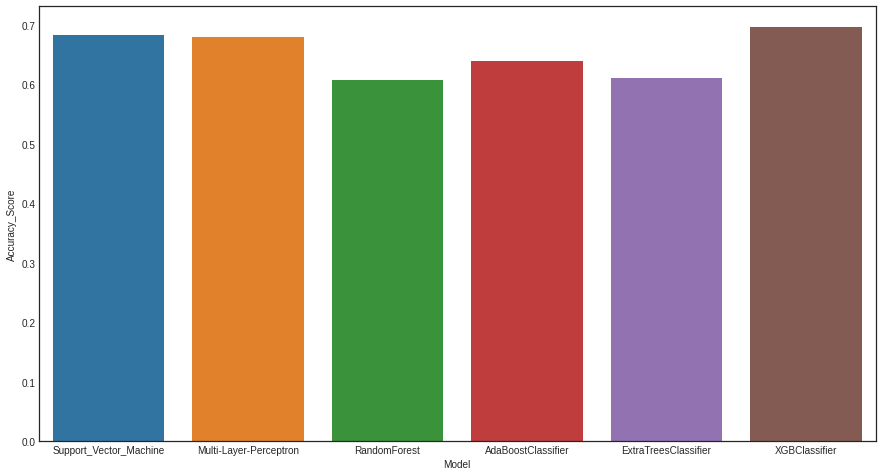

In [ ]:
rcParams['figure.figsize'] = 15,8
sns.barplot(data=evaluation,x='Model', y='Accuracy_Score')

## Classification report

In [ ]:
report_list = []
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    report= classification_report(y_test,y_pred)
    report_list.append(report)

In [ ]:
for m in algos:
  print(m)

SVC(C=3.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
           

In [ ]:
for model_report in report_list:
  print('----------------------------------------------------------')
  #[m for m in names]
  print(model_report)

----------------------------------------------------------
              precision    recall  f1-score   support

           1       0.59      0.08      0.14       159
           2       0.68      0.95      0.79       849
           3       0.70      0.35      0.47       381

    accuracy                           0.68      1389
   macro avg       0.66      0.46      0.47      1389
weighted avg       0.68      0.68      0.63      1389

----------------------------------------------------------
              precision    recall  f1-score   support

           1       0.49      0.19      0.27       159
           2       0.75      0.85      0.80       849
           3       0.58      0.56      0.57       381

    accuracy                           0.69      1389
   macro avg       0.61      0.53      0.55      1389
weighted avg       0.67      0.69      0.67      1389

----------------------------------------------------------
              precision    recall  f1-score   support

      